In [13]:
from ucimlrepo import fetch_ucirepo 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [14]:
# Fetch dataset 
mushroom = fetch_ucirepo(id=73)

In [15]:
# Retrieve features and targets
X = mushroom.data.features 
y = mushroom.data.targets

In [16]:
# Explore data types
X.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [17]:
# Print feature values
for column in X.columns:
    if X[column].dtype == 'object':
        print(f'{column}: {X[column].unique()}')

cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' nan]
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [18]:
# Identify NaN values
X.isna().mean()

cap-shape                   0.000000
cap-surface                 0.000000
cap-color                   0.000000
bruises                     0.000000
odor                        0.000000
gill-attachment             0.000000
gill-spacing                0.000000
gill-size                   0.000000
gill-color                  0.000000
stalk-shape                 0.000000
stalk-root                  0.305268
stalk-surface-above-ring    0.000000
stalk-surface-below-ring    0.000000
stalk-color-above-ring      0.000000
stalk-color-below-ring      0.000000
veil-type                   0.000000
veil-color                  0.000000
ring-number                 0.000000
ring-type                   0.000000
spore-print-color           0.000000
population                  0.000000
habitat                     0.000000
dtype: float64

In [19]:
# One-hot encode all columns
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)
feature_names = encoder.get_feature_names_out(X.columns)

# Split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20, random_state=42)

In [20]:
# Fit decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score


clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

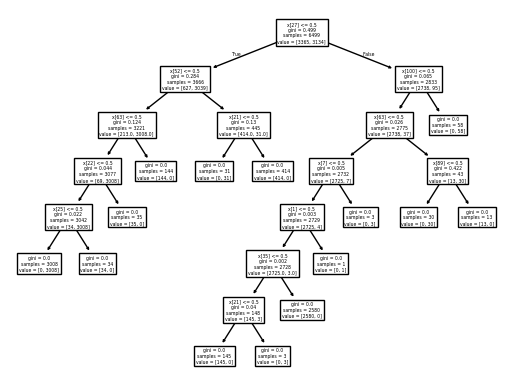

In [21]:
# Plot
tree.plot_tree(clf);

In [22]:
# Print tree
r = tree.export_text(clf, feature_names=feature_names)
print(r)

|--- odor_n <= 0.50
|   |--- stalk-root_c <= 0.50
|   |   |--- stalk-surface-below-ring_y <= 0.50
|   |   |   |--- odor_a <= 0.50
|   |   |   |   |--- odor_l <= 0.50
|   |   |   |   |   |--- class: p
|   |   |   |   |--- odor_l >  0.50
|   |   |   |   |   |--- class: e
|   |   |   |--- odor_a >  0.50
|   |   |   |   |--- class: e
|   |   |--- stalk-surface-below-ring_y >  0.50
|   |   |   |--- class: e
|   |--- stalk-root_c >  0.50
|   |   |--- bruises_t <= 0.50
|   |   |   |--- class: p
|   |   |--- bruises_t >  0.50
|   |   |   |--- class: e
|--- odor_n >  0.50
|   |--- spore-print-color_r <= 0.50
|   |   |--- stalk-surface-below-ring_y <= 0.50
|   |   |   |--- cap-surface_g <= 0.50
|   |   |   |   |--- cap-shape_c <= 0.50
|   |   |   |   |   |--- gill-size_b <= 0.50
|   |   |   |   |   |   |--- bruises_t <= 0.50
|   |   |   |   |   |   |   |--- class: e
|   |   |   |   |   |   |--- bruises_t >  0.50
|   |   |   |   |   |   |   |--- class: p
|   |   |   |   |   |--- gill-size_b >  0.

I used ChatGPT to quickly re-write the above tree output into a dichotomous key of the type that biologists typically use in the field.
- If odor is not none:
  - If stalk-root is not club:
    - If stalk-surface-below-ring is not scaly:
      - If odor is not almond:
        - If odor is not anise:
          - Class: poisonous
        - If odor is anise:
          - Class: edible
      - If odor is almond:
        - Class: edible
    - If stalk-surface-below-ring is scaly:
      - Class: edible
  - If stalk-root is club:
    - If habitat is not woods:
      - Class: edible
    - If habitat is woods:
      - Class: poisonous
- If odor is none:
  - If spore-print-color is not green:
    - If stalk-surface-below-ring is not scaly:
      - If cap-surface is not grooves:
        - If cap-shape is not conical:
          - If gill-size is not narrow:
            - Class: edible
          - If gill-size is narrow:
            - If bruises is not no:
              - Class: poisonous
            - If bruises is no:
              - Class: edible
        - If cap-shape is conical:
          - Class: poisonous
      - If cap-surface is grooves:
        - Class: poisonous
    - If stalk-surface-below-ring is scaly:
      - If ring-number is not two:
        - Class: poisonous
      - If ring-number is two:
        - Class: edible
  - If spore-print-color is green:
    - Class: poisonous




Accuracy: 1.00


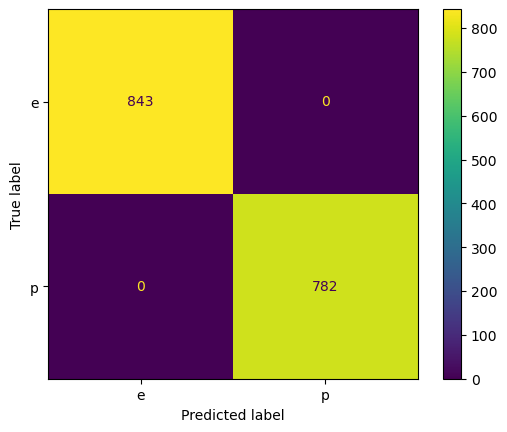

In [23]:
# Inspect accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the labels for the test data
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();